## Bernoulli distribution

$$ x\in\{0,1\}$$
Two outcomes, for instance it might be head and tales

$$x \sim Bern(x|p) = p^x(1-p)^{1-x}$$ 

### Proof for $\mathbb{E}[x] = p$ & $var[x]=p(1-p)$
$$ \mathbb{E}[x], x\sim Bern(x|p)$$
$$ \mathbb{E}\left[x\right] = P(x=0) \cdot 0 + P(x=1) \cdot 1 = 0\cdot(1-p)+1\cdot p = p$$
$$ var[x] = \mathbb{E}\left[x^2\right]-\mathbb{E}[x]^2 = P(x=0) \cdot 0 + P(x=1) \cdot 1^2 -p^2  = p(1-p)$$

### Maximum likelihood
$$p(\mathcal{D} | \mu) = \prod_{n=1}^{N} p(x_n | \mu) = \prod_{n=1}^{N} \mu^{x_n} (1 - \mu)^{1 - x_n}$$
$$\ln p(\mathcal{D} | \mu) = \sum_{n=1}^{N} \ln p(x_n | \mu) = \sum_{n=1}^{N} \left\{ x_n \ln \mu + (1 - x_n) \ln(1 - \mu) \right\}$$

#### Mean and of the maximum likelihood
$$\frac{\partial}{\partial \mu}\left(\ln p(\mathcal{D} | \mu) \right) = 0 $$

$$ \Rightarrow \mu_{ML} = \frac{1}{N}\sum^N_{n=1}x_n$$






## Binomial distribution

$$Bin(m|,\mu) = \binom{N}{m}\mu^m(1-\mu)^{N-m} = \frac{N!}{(N - m)!m!}\mu^m(1-\mu)^{N-m}$$

### Proof for $\mathbb{E}[x] = N\mu$ & $var[x]=N\mu(1-\mu)$

$$ \mathbb{E}[x] = \sum^N_{m=0}mBin(m|N,\mu) = \sum^N_{m=0} m\frac{N!}{(N - m)!m!}\mu^m(1-\mu)^{N-m}$$
$$\Rightarrow  \sum^N_{m=0} \frac{mN!}{(N - m)!m(m-1)!}\mu^m(1-\mu)^{N-m}  $$ 

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from tools import scatter_2d_data, bar_per_axis
np.random.seed(1234)
n = 5
k = 1
mu = np.array([0.5])
var = 0.5
# k = len(mu)
# p = np.random.normal(mu,var*np.identity(k),k)
# print(p)

type(np.random.multivariate_normal(mu,var**2*np.identity(k),n))

numpy.ndarray

In [32]:
mu_ml = np.zeros((1+1,1))
mu_ml[0] = 1
print(mu_ml)

[[1.]
 [0.]]


In [33]:
n = 2
x = np.array([1,2])
mu = np.mean(x)
mu_ml = np.zeros((n+1,1))
mu_ml[0] = mu
for i in range(n):
    mu_ml[i] = mu_ml[i-1]+1/n*(x[i]-mu_ml[i-1])

print(mu_ml)

[[0.5 ]
 [1.25]
 [0.  ]]


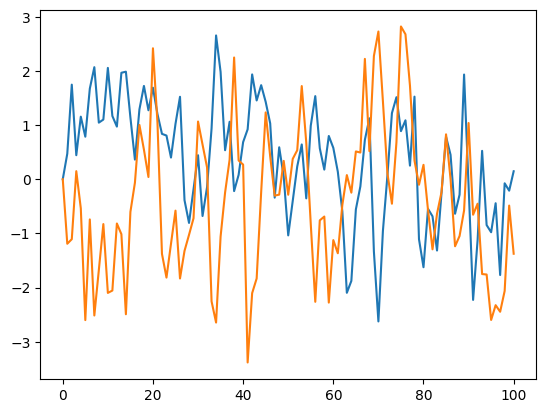

In [83]:
np.random.seed(1234)
def gen_data(
    n: int,
    k: int,
    mean: np.ndarray,
    std: np.float64
) -> np.ndarray:
    '''Generate n values samples from the k-variate
    normal distribution
    '''
    # Þarf að laga input
    cov = std**2*np.identity(k)
    p = np.random.multivariate_normal(mean,cov,n)
    return p

def update_sequence_mean(
    mu: np.ndarray,
    x: np.ndarray,
    n: int
) -> np.ndarray:
    '''Performs the mean sequence estimation update
    '''
    mu_ml = mu+1/n*(x-mu)

    return mu_ml

data = gen_data(100,2,np.array([0,0]),3) # Set this as the data
estimates = [np.array([0, 0])]

for i in range(data.shape[0]):
    estimates.append(update_sequence_mean(estimates[i],data[i],3))

plt.plot([e[0] for e in estimates], label='First dimension')
plt.plot([e[1] for e in estimates], label='First dimension')
plt.show()
#     print(estimates[])





In [111]:
np.random.seed(1234)
def _square_error(y, y_hat):
    """
    """
    se = []
    for i in range(len(y)):
        se.append(np.power(y[i]-y_hat[i],2))
    mse = np.mean(se,0)
    return mse


_square_error(np.array([0,1]),np.array([0,2]))

data = gen_data(100,2,np.array([0,0]),3) # Set this as the data
estimates = [np.array([0, 0])]
means = [data[0,:]]



array([False, False])

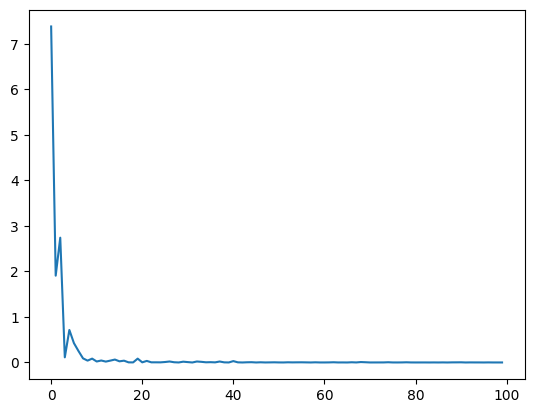

In [99]:
import matplotlib.pyplot as plt
import numpy as np

from tools import scatter_2d_data, bar_per_axis
np.random.seed(1234)

def gen_data(
    n: int,
    k: int,
    mean: np.ndarray,
    std: np.float64
) -> np.ndarray:
    '''Generate n values samples from the k-variate
    normal distribution
    '''
    # Þarf að laga input
    cov = std**2*np.identity(k)
    p = np.random.multivariate_normal(mean,cov,n)

    return p

def update_sequence_mean(
    mu: np.ndarray,
    x: np.ndarray,
    n: int
) -> np.ndarray:
    '''Performs the mean sequence estimation update
    '''
    # mu_2 = np.mean(x,0)
    # n_2 = x.shape[0]
    # new_mu = (mu*(n-n_2)+mu_2*n_2)/n
    mu_ml = mu+1/n*(x-mu)

    return mu_ml

def _plot_sequence_estimate():
    '''
    
    '''
    data = gen_data(100,2,np.array([0,0]),3) # Set this as the data
    estimates = [np.array([0, 0])]
    for i in range(data.shape[0]):
        estimates.append(update_sequence_mean(estimates[i],data[i],i+1))
    plt.plot([e[0] for e in estimates], label='First dimension')
    plt.plot([e[1] for e in estimates], label='Second dimension')  
    plt.legend(loc='upper center')
    plt.xlabel("N")
    plt.ylabel(r"$\mu_{ML}$")
    plt.show()


def _square_error(y, y_hat):
    """
    """
    se = np.power(y-y_hat,2) # Allows k-size vectors
    mse = np.mean(se)

    return mse

    

data = gen_data(100,2,np.array([0,0]),3) # Set this as the data
estimates = [np.array([0,0])]
actual = []
mse = []
for i in range(len(data)):
    estimates.append(update_sequence_mean(estimates[i],data[i],i+1))
    actual.append(np.mean(data[0:i+1],0))
    mse.append(_square_error(actual[i],estimates[i]))


plt.plot(mse)



